In [1]:
import pandas as pd
df = pd.read_csv("Datasets/MNIST/mnist_784_csv.csv")

In [2]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [3]:
data=df.iloc[:, :-1]
labels=df.iloc[:, -1]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1, random_state=42)

In [5]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
42878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(X_train.shape)
print(data.shape)

(63000, 784)
(70000, 784)


In [7]:
import numpy as np
X_train= np.reshape(X_train, (len(X_train),28,28,1))
X_test= np.reshape(X_test, (len(X_test),28,28,1))

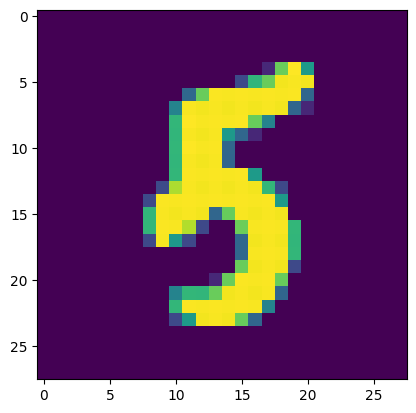

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3])

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes=10)

In [10]:
from tensorflow.keras import layers, models, optimizers
model=models.Sequential()

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dense(64, activation= 'relu'))
model.add(layers.Dense(10,activation='softmax'))

In [12]:
model.compile(optimizer= optimizers.Adam(), loss= 'categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs= 5, batch_size=32, validation_split=0.2)

Epoch 1/5
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9807 - loss: 0.0718 - val_accuracy: 0.9772 - val_loss: 0.0829
Epoch 2/5
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9835 - loss: 0.0620 - val_accuracy: 0.9793 - val_loss: 0.0811
Epoch 3/5
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9834 - loss: 0.0642 - val_accuracy: 0.9764 - val_loss: 0.1048
Epoch 4/5
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9864 - loss: 0.0515 - val_accuracy: 0.9779 - val_loss: 0.0971
Epoch 5/5
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9857 - loss: 0.0557 - val_accuracy: 0.9771 - val_loss: 0.1019


In [39]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9668 - loss: 0.1824


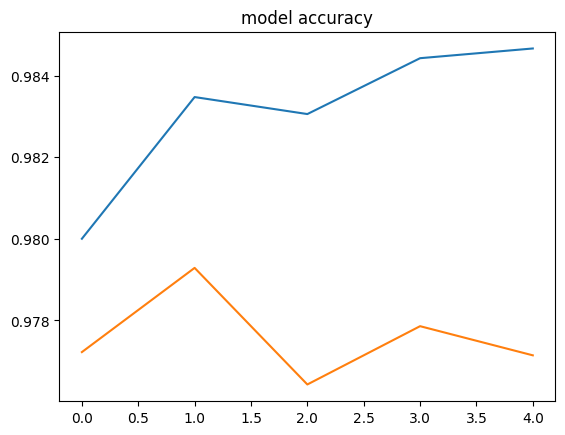

In [40]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('model accuracy')
plt.show()

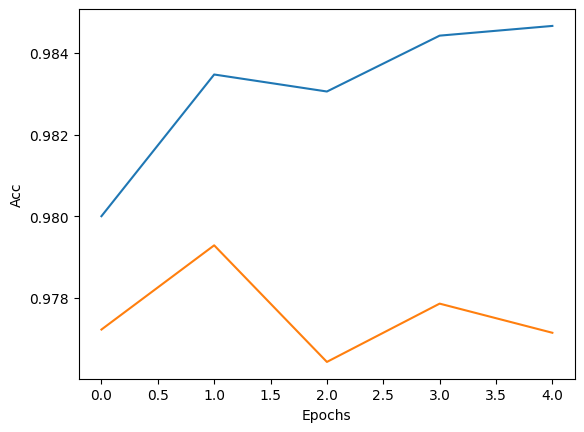

In [41]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.show()


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


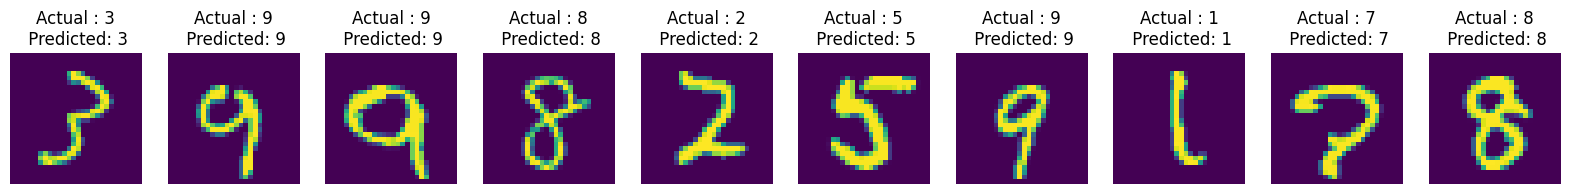

In [42]:
pred= model.predict(X_test)
pred=np.argmax(pred, axis=1)
plt.figure(figsize=(20,6))
for i in range (10,20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i])
    actual_label=np.argmax(y_test[i])
    predicted_label=pred[i]
    plt.title(f"Actual : {actual_label}\n Predicted: {predicted_label}")
    plt.axis('off')
    
plt.show()